sec:000001
sec:000002
sec:000004
sec:000005
sec:000006
sec:000007
sec:000008
sec:000009


/home/djh/anaconda3/envs/backtrader/lib/python3.9/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/home/djh/anaconda3/envs/backtrader/lib/python3.9/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/home/djh/anaconda3/envs/backtrader/lib/python3.9/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pri

Dropped 1.1% entries from factor data: 1.0% in forward returns computation and 0.1% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
                                        1D        5D       10D  factor  \
date                      asset                                          
2020-01-02 00:00:00+00:00 000001  0.020341 -0.005249 -0.035433    0.79   
2020-01-03 00:00:00+00:00 000001 -0.007074 -0.031511 -0.050804    0.58   
2020-01-06 00:00:00+00:00 000001  0.005181 -0.005181 -0.040155    0.44   
2020-01-07 00:00:00+00:00 000001 -0.031572 -0.025129 -0.074098    0.38   
2020-01-08 00:00:00+00:00 000001  0.008649 -0.009315 -0.037924    0.44   

                                  factor_quantile  
date                      asset                    
2020-01-02 00:00:00+00:00 000001              1.0  
2020-01-03 00:00:00+00:00 000001              1.0  
2020-01-06 00:00:00+00:00 000001              1.0  
2020-01-07 00:00:00+00:0

min    max      mean       std  count    count %
factor_quantile                                                   
1.0              0.01   1.97  0.509167  0.221367   1945  25.371771
2.0              0.31   2.21  0.730135  0.294250    961  12.535873
3.0              0.33   8.13  1.108100  0.575828   1889  24.641273
4.0              0.54   8.86  1.928937  0.979932    960  12.522828
5.0              0.78  45.64  5.204129  4.698990   1911  24.928255

Returns Analysis


1D     5D    10D
Ann. alpha                                    -0.075 -0.033 -0.017
beta                                           1.288  1.243  1.231
Mean Period Wise Return Top Quantile (bps)     0.892 -0.167 -0.775
Mean Period Wise Return Bottom Quantile (bps) -7.461 -5.750 -6.876
Mean Period Wise Spread (bps)                  8.353  3.128  3.610

<Figure size 640x480 with 0 Axes>

Information Analysis


1D     5D    10D
IC Mean          -0.019 -0.021 -0.017
IC Std.           0.430  0.422  0.428
Risk-Adjusted IC -0.045 -0.051 -0.039
t-stat(IC)          NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN
IC Skew             NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN

/home/djh/anaconda3/envs/backtrader/lib/python3.9/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


/home/djh/anaconda3/envs/backtrader/lib/python3.9/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover   0.302  0.400  0.424
Quantile 2.0 Mean Turnover   0.678  0.791  0.789
Quantile 3.0 Mean Turnover   0.469  0.585  0.578
Quantile 4.0 Mean Turnover   0.593  0.728  0.748
Quantile 5.0 Mean Turnover   0.206  0.310  0.328

1D     5D    10D
Mean Factor Rank Autocorrelation  0.84  0.739  0.708

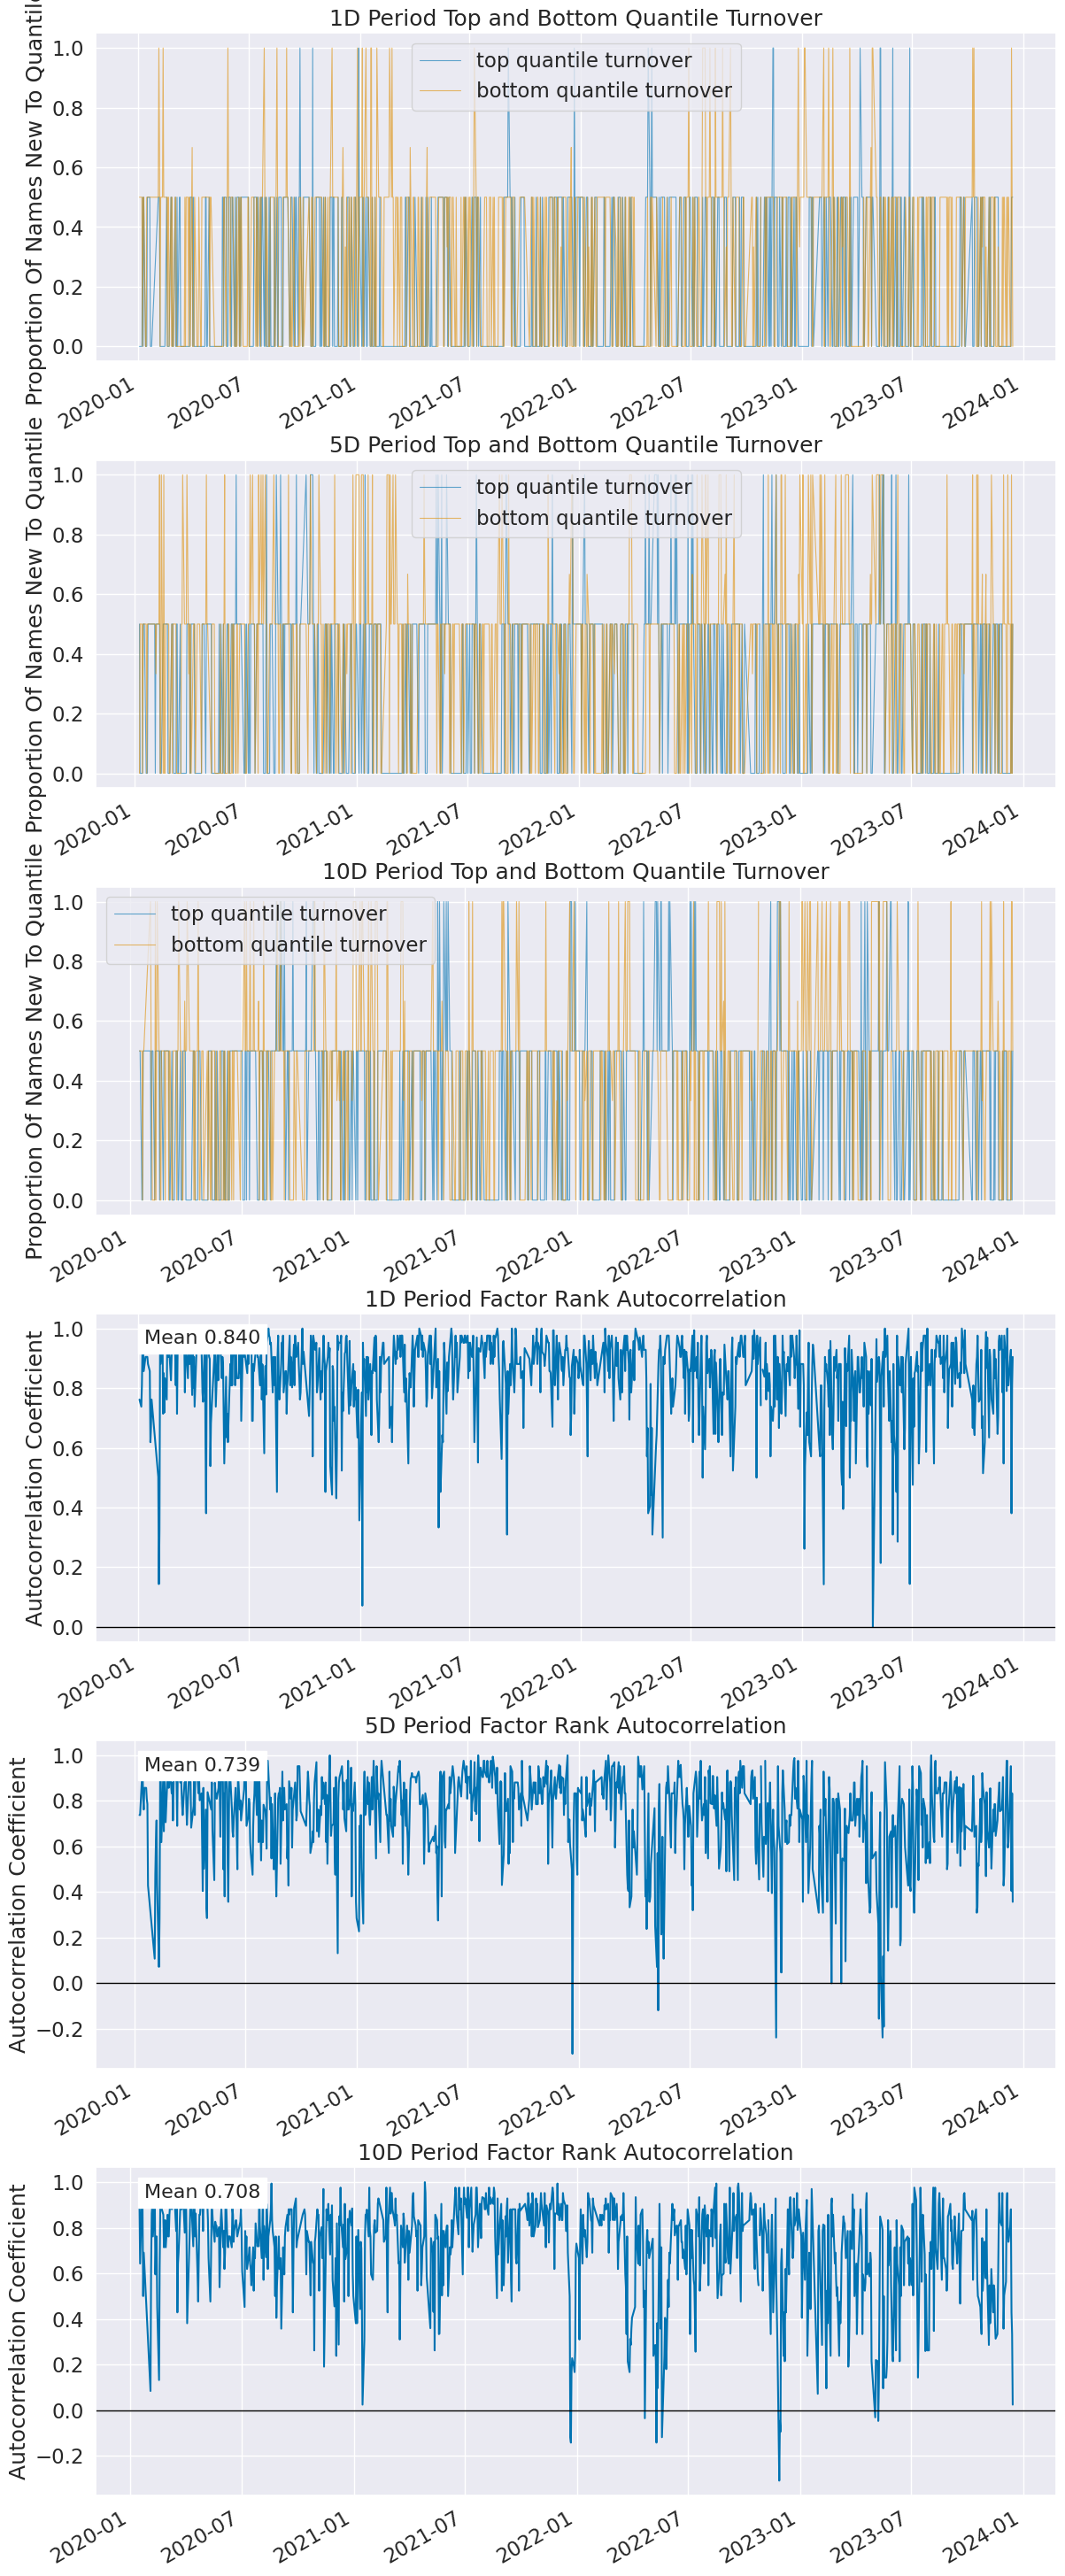

In [10]:
import akshare as ak
import pandas as pd
from typing import List
import alphalens

def prepare_data(secs: List[str], start: str, end: str):
    factors = []
    prices = []

    for sec in secs:
        bars = ak.stock_zh_a_hist(sec, adjust="qfq", start_date=start, end_date=end)
        if(bars.shape[0] == 0):
            continue
        print(f"sec:{sec}")
        bars["asset"] = [sec] * len(bars)
        prices.append(bars[["日期", "asset", "收盘"]])
        factors.append(bars[["日期", "asset", "换手率"]])

    # 处理因子表
    factor = pd.concat(factors)
    factor.rename(columns = {"换手率":"factor", "日期":"date"}, inplace=True)
    factor["date"] = pd.to_datetime(factor["date"], utc=True)
    factor.set_index(["date", "asset"], inplace=True)

    prices = pd.concat(prices)
    prices = prices.pivot(index="日期", columns="asset", values="收盘")
    prices.index = pd.to_datetime(prices.index, utc=True)
    prices.rename_axis('date', inplace=True)

    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
                                            factor, 
                                            prices, 
                                            quantiles=5,
                                            # periods=(1, 5, 10),
                                            # filter_zscore=20,
                                            # max_loss=0.35,
                                            # groupby=None,
                                            # binning_by_group=False,
                                            # bins=None,
                                            # groupby_labels=None,
                                            # zero_aware=True,
                                            # cumulative_returns=True,
                                        )
    print(factor_data.head())
    alphalens.tears.create_full_tear_sheet(factor_data,long_short=False)



df = ak.index_stock_cons_csindex(symbol="000300")
secs = df["成分券代码"]
secs = ['000001','000002','000003','000004','000005','000006','000007','000008','000009']
# secs = ['000001','000002','000003']
prepare_data(secs, start="20200101", end="20240101")

# 图表含义：https://zhuanlan.zhihu.com/p/555479371